In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
LPP=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\python\Data\LPP\Loan_data.csv')

In [59]:
LPP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [5]:
LPP['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [6]:
LPP.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
LPP.shape

(614, 13)

In [8]:
LPP.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
LPP.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.0,1897.55,2216.1,2877.5,3812.5,5795.00,9459.9,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.00,0.0,0.0,1188.5,2297.25,3782.2,4997.4,8895.89,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,30.0,56.00,71.0,100.0,128.0,168.00,235.8,297.8,496.36,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,294.0,360.0,360.0,360.00,360.0,360.0,480.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0


In [10]:
LPP.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T.to_csv(r'C:\Users\prince.garg\Desktop\Deepika\python\Data\LPP_cont_univariate.csv')

In [11]:
LPP.groupby(['Loan_Status','Gender'])['Loan_ID'].count().reset_index()

,Loan_Status,Gender,Loan_ID
0,N,Female,37
1,N,Male,150
2,Y,Female,75
3,Y,Male,339


In [12]:
LPP.groupby(['Loan_Status','Married'])['Loan_ID'].count().reset_index()

,Loan_Status,Married,Loan_ID
0,N,No,79
1,N,Yes,113
2,Y,No,134
3,Y,Yes,285


In [13]:
LPP.groupby(['Loan_Status','Dependents'])['Loan_ID'].count().reset_index()

,Loan_Status,Dependents,Loan_ID
0,N,0,107
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,238
5,Y,1,66
6,Y,2,76
7,Y,3+,33


In [14]:
LPP.groupby(['Loan_Status','Education'])['Loan_ID'].count().reset_index()

,Loan_Status,Education,Loan_ID
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


In [15]:
LPP.groupby(['Loan_Status','Self_Employed'])['Loan_ID'].count().reset_index()

,Loan_Status,Self_Employed,Loan_ID
0,N,No,157
1,N,Yes,26
2,Y,No,343
3,Y,Yes,56


In [16]:
LPP.groupby(['Loan_Status','Property_Area'])['Loan_ID'].count().reset_index()

,Loan_Status,Property_Area,Loan_ID
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


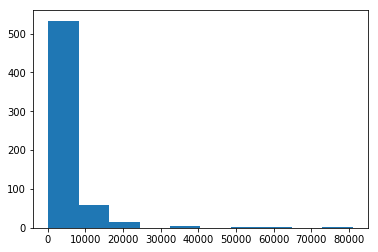

In [17]:
plt.hist(LPP['ApplicantIncome'])
plt.show()

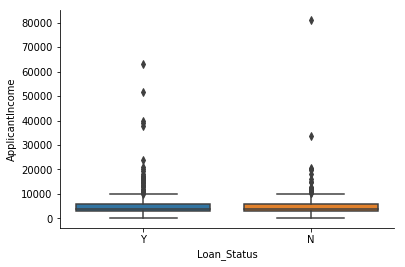

In [18]:
sns.boxplot(y=LPP['ApplicantIncome'],x=LPP['Loan_Status'],data=LPP)
sns.despine()

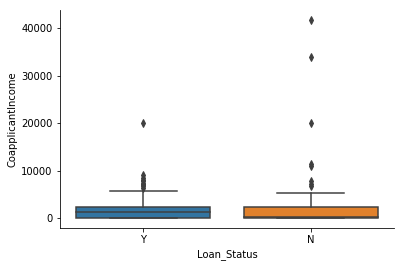

In [19]:
sns.boxplot(y=LPP['CoapplicantIncome'],x=LPP['Loan_Status'],data=LPP)
sns.despine()

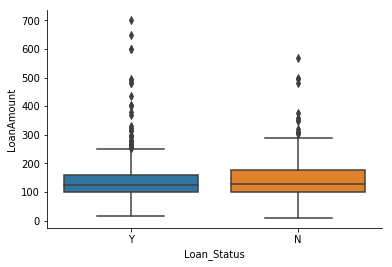

In [20]:
sns.boxplot(y=LPP['LoanAmount'],x=LPP['Loan_Status'],data=LPP)
sns.despine()

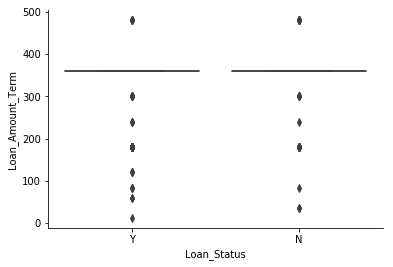

In [21]:
sns.boxplot(y=LPP['Loan_Amount_Term'],x=LPP['Loan_Status'],data=LPP)
sns.despine()

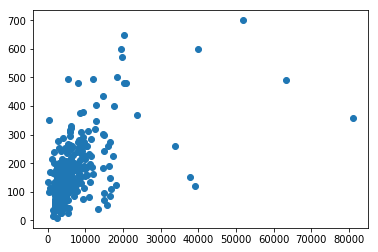

In [22]:
plt.scatter(LPP['ApplicantIncome'],LPP['LoanAmount'])
plt.show()

In [23]:
LPP['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
LPP1=LPP[LPP['Loan_Status']=='Y']
LPP1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [25]:
LPP2=LPP[LPP['Loan_Status']=='N']
LPP2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [26]:
# for i in LPP.columns:
#     if (LPP[i].dtypes=='O'):
#         print(LPP[i].value_counts())
    
pieces = []
for col in LPP.columns:
    if ((LPP[col].dtypes=='O') & (col != 'Loan_ID')):
            tmp_series = LPP[col].value_counts()
            tmp_series.name = col
            pieces.append(tmp_series)

    
    
    
    
    
    
    
    
    
    
    

In [27]:
pd.DataFrame(pieces).T.to_csv(r'C:\Users\prince.garg\Desktop\Deepika\python\Data\LPP_cat_univariate.csv')

In [3]:
LPP['Gender'].fillna('Male',inplace=True)


In [4]:
LPP['Married'].fillna('Yes',inplace=True)

In [5]:
LPP['Dependents'].fillna('0',inplace=True)

In [6]:
LPP['Self_Employed'].fillna('No',inplace=True)

In [7]:
LPP['LoanAmount'].fillna(LPP['LoanAmount'].mean(),inplace=True)

In [8]:
LPP['Loan_Amount_Term'].fillna(360,inplace=True)

In [34]:
LPP['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
LPP['Credit_History'].fillna(1.0,inplace=True)

In [19]:
D1=pd.get_dummies(LPP,columns=['Gender','Self_Employed','Dependents','Married','Education','Property_Area','Loan_Status'], drop_first=True)
D1


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,1,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1,1,0,1,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,LP002979,4106,0.0,40.000000,180.0,1.0,1,0,0,0,1,1,0,0,0,1
611,LP002983,8072,240.0,253.000000,360.0,1.0,1,0,1,0,0,1,0,0,1,1
612,LP002984,7583,0.0,187.000000,360.0,1.0,1,0,0,1,0,1,0,0,1,1


In [20]:
LPP_new=D1.drop(['Loan_ID'],axis=1)
LPP_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1,1,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,0,0,0,1,1,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,0,1,0,0,1,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,0,0,1,0,1,0,0,1,1


In [21]:
#Modeling
X=LPP_new.drop(['Loan_Status_Y'],axis=1)

In [22]:
Y=LPP_new['Loan_Status_Y']

In [40]:
lo_reg=LogisticRegression()

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [42]:
Y_test.shape

(123,)

In [43]:
lo_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
#cross validation
kfold=KFold(n_splits=5,random_state=10)

In [45]:
pred_train_kfold=cross_val_predict(lo_reg,X_train,Y_train,cv=kfold)

In [46]:
pred_train_kfold

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
#prediction on train
pred_train=lo_reg.predict(X_train)

In [48]:
pred_proba_train=lo_reg.predict_proba(X_train)[:,1]

In [49]:
print(confusion_matrix(Y_train,pred_train))
print(accuracy_score(Y_train,pred_train))
print(recall_score(Y_train,pred_train))
print(precision_score(Y_train,pred_train))
print(f1_score(Y_train,pred_train))

[[ 68  85]
 [  7 331]]
0.8126272912423625
0.9792899408284024
0.7956730769230769
0.8779840848806365


In [50]:
fpr,tpr,thr=roc_curve(Y_train,pred_proba_train,drop_intermediate=False)

In [51]:
roc_auc_score(Y_train,pred_proba_train)

0.7950458289824807

In [52]:
#prediction on test
pred_test=lo_reg.predict(X_test)

In [89]:
pred_proba_test=lo_reg.predict_proba(X_test)[:,1]

In [54]:
print(confusion_matrix(Y_test,pred_test))
print(accuracy_score(Y_test,pred_test))
print(recall_score(Y_test,pred_test))
print(precision_score(Y_test,pred_test))
print(f1_score(Y_test,pred_test))

[[16 23]
 [ 1 83]]
0.8048780487804879
0.9880952380952381
0.7830188679245284
0.8736842105263158


In [55]:
fpr1,tpr1,thr1=roc_curve(Y_test,pred_proba_test,drop_intermediate=False)

In [56]:
print(thr1)

[0.94202286 0.91063471 0.90636724 0.89534318 0.89171537 0.88924701
 0.88883127 0.88782338 0.88603113 0.88597735 0.88449375 0.8783979
 0.87752853 0.87031489 0.86797758 0.86596006 0.86390694 0.86244048
 0.86146362 0.85823879 0.85774953 0.85674267 0.85466525 0.85435639
 0.85270221 0.84281253 0.84063009 0.83943416 0.83740688 0.83380525
 0.83292812 0.83282499 0.82956522 0.82701943 0.82691558 0.82278843
 0.82132024 0.81963928 0.81728904 0.81670913 0.81371349 0.81261799
 0.80758025 0.80604855 0.8046698  0.80296384 0.80184363 0.79617224
 0.79516742 0.79505784 0.79366297 0.7886169  0.78593156 0.78388251
 0.7808113  0.78051629 0.77720904 0.77596831 0.77482304 0.76942683
 0.76774579 0.76764599 0.76649062 0.76529716 0.7595106  0.75846645
 0.75802543 0.74678955 0.74546693 0.74060039 0.74011383 0.73926293
 0.73917961 0.73861872 0.73491675 0.73426262 0.73425003 0.72922543
 0.72247558 0.72102652 0.7179799  0.71063836 0.70555532 0.70479011
 0.70254692 0.69986914 0.69962704 0.69302652 0.6929072  0.69268

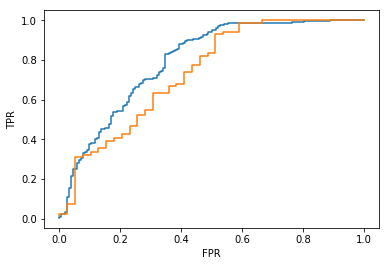

In [57]:
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [58]:
roc_auc_score(Y_test,pred_proba_test)

0.7365689865689866

In [77]:
#Decision Tree
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)


In [78]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
#prediction on train
pred_train1=Dt.predict(X_train)


In [82]:
pred_proba_train1=Dt.predict_proba(X_train)[:,1]

In [85]:
print(confusion_matrix(Y_train,pred_train1))
print(accuracy_score(Y_train,pred_train1))
print(recall_score(Y_train,pred_train1))
print(precision_score(Y_train,pred_train1))
print(f1_score(Y_train,pred_train1))

[[ 71  82]
 [  4 334]]
0.824847250509165
0.9881656804733728
0.8028846153846154
0.8859416445623344


In [86]:
FPR,TPR,THR=roc_curve(Y_train,pred_proba_train1)

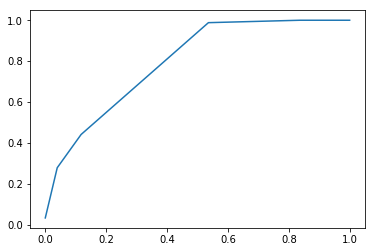

In [87]:
plt.plot(FPR,TPR)

In [88]:
roc_auc_score(Y_train,pred_proba_train1)

0.795432571450671

In [90]:
#prediction on test
pred_test1=Dt.predict(X_test)

In [96]:
pred_proba_test1=Dt.predict_proba(X_test)[:,1]

In [92]:
print(confusion_matrix(Y_test,pred_test1))
print(accuracy_score(Y_test,pred_test1))
print(recall_score(Y_test,pred_test1))
print(precision_score(Y_test,pred_test1))
print(f1_score(Y_test,pred_test1))

[[16 23]
 [ 1 83]]
0.8048780487804879
0.9880952380952381
0.7830188679245284
0.8736842105263158


In [97]:
FPR1,TPR1,THR1=roc_curve(Y_test,pred_proba_test1)

In [98]:
roc_auc_score(Y_test,pred_proba_test1)

0.7437423687423688

Text(0,0.5,'TPR')

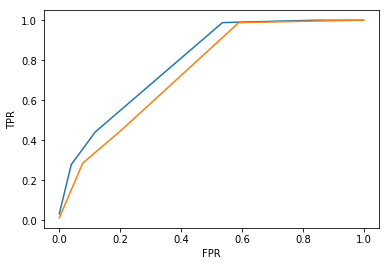

In [100]:
plt.plot(FPR,TPR)
plt.plot(FPR1,TPR1)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [103]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc=RandomForestClassifier(n_estimators=50,max_depth=4)

In [108]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
pr=rfc.predict(X_train)

In [110]:
print(confusion_matrix(Y_train,pr))
print(accuracy_score(Y_train,pr))
print(recall_score(Y_train,pr))
print(precision_score(Y_train,pr))
print(f1_score(Y_train,pr))

[[ 70  83]
 [  5 333]]
0.8207739307535642
0.985207100591716
0.8004807692307693
0.8832891246684349


In [111]:
pr1=rfc.predict(X_test)

In [112]:
print(confusion_matrix(Y_test,pr1))
print(accuracy_score(Y_test,pr1))
print(recall_score(Y_test,pr1))
print(precision_score(Y_test,pr1))
print(f1_score(Y_test,pr1))

[[16 23]
 [ 1 83]]
0.8048780487804879
0.9880952380952381
0.7830188679245284
0.8736842105263158


# Model- Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf=RandomForestClassifier()

In [24]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [25]:
# prediction on train
rf_pred_train=rf.predict(X_train)

In [26]:
print(confusion_matrix(Y_train,rf_pred_train))
print(accuracy_score(Y_train,rf_pred_train))
print(recall_score(Y_train,rf_pred_train))
print(precision_score(Y_train,rf_pred_train))
print(f1_score(Y_train,rf_pred_train))

[[153   0]
 [  0 338]]
1.0
1.0
1.0
1.0


In [28]:
# prediction on test
rf_pred_test=rf.predict(X_test)

In [29]:
print(confusion_matrix(Y_test,rf_pred_test))
print(accuracy_score(Y_test,rf_pred_test))
print(recall_score(Y_test,rf_pred_test))
print(precision_score(Y_test,rf_pred_test))
print(f1_score(Y_test,rf_pred_test))

[[18 21]
 [ 4 80]]
0.7967479674796748
0.9523809523809523
0.7920792079207921
0.8648648648648649


It seems like it is a overfitted model as there is significant percentage loss in accuracy, precision, f1 score in predicting test data compared to prection on training data.
So we will do hyperparameter tuning

# Hyperparameter tuning- Random Forest

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
params={'n_estimators':[75,100,125],
       'min_samples_leaf':[25,30],
       'max_depth':[4,5,6]}

In [33]:
rsv=RandomizedSearchCV(rf,params,n_iter=5)

In [34]:
rsv_rf=rsv.fit(X_train,Y_train)

In [35]:
rsv_rf.best_params_

{'n_estimators': 75, 'min_samples_leaf': 25, 'max_depth': 4}

In [36]:
rsv_rf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [37]:
rf_model=RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [38]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [39]:
# prediction on train
rf_model_predict1=rf_model.predict(X_train)

In [44]:
rf_pred_proba1=rf_model.predict_proba(X_train)[:,1]

In [45]:
FPR,TPR,THR=roc_curve(Y_train,rf_pred_proba1)

In [52]:
roc_auc_score(Y_train,rf_pred_proba1)

0.8330336079204859

In [40]:
print(confusion_matrix(Y_train,rf_model_predict1))
print(accuracy_score(Y_train,rf_model_predict1))
print(recall_score(Y_train,rf_model_predict1))
print(precision_score(Y_train,rf_model_predict1))
print(f1_score(Y_train,rf_model_predict1))

[[ 60  93]
 [  5 333]]
0.8004073319755601
0.985207100591716
0.7816901408450704
0.8717277486910995


In [41]:
# prediction on test
rf_model_predict2=rf_model.predict(X_test)

In [46]:
rf_pred_proba2=rf_model.predict_proba(X_test)[:,1]

In [47]:
FPR1,TPR1,THR1=roc_curve(Y_test,rf_pred_proba2)

In [53]:
roc_auc_score(Y_test,rf_pred_proba2)

0.8000610500610501

In [42]:
print(confusion_matrix(Y_test,rf_model_predict2))
print(accuracy_score(Y_test,rf_model_predict2))
print(recall_score(Y_test,rf_model_predict2))
print(precision_score(Y_test,rf_model_predict2))
print(f1_score(Y_test,rf_model_predict2))

[[12 27]
 [ 1 83]]
0.7723577235772358
0.9880952380952381
0.7545454545454545
0.8556701030927836


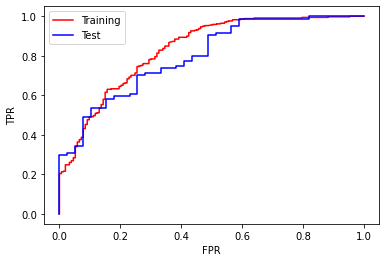

In [55]:
plt.plot(FPR,TPR,c='red',label='Training')
plt.plot(FPR1,TPR1,c='blue',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Model- XGBoost

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb=XGBClassifier()

In [59]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Prediction on train
xgb_pred=xgb.predict(X_train)

In [61]:
print(confusion_matrix(Y_train,xgb_pred))
print(accuracy_score(Y_train,xgb_pred))
print(recall_score(Y_train,xgb_pred))
print(precision_score(Y_train,xgb_pred))
print(f1_score(Y_train,xgb_pred))

[[153   0]
 [  0 338]]
1.0
1.0
1.0
1.0


In [62]:
# Prediction on test
xgb_pred_test=xgb.predict(X_test)

In [63]:
print(confusion_matrix(Y_test,xgb_pred_test))
print(accuracy_score(Y_test,xgb_pred_test))
print(recall_score(Y_test,xgb_pred_test))
print(precision_score(Y_test,xgb_pred_test))
print(f1_score(Y_test,xgb_pred_test))

[[20 19]
 [ 9 75]]
0.7723577235772358
0.8928571428571429
0.7978723404255319
0.8426966292134832


It seems like it is a overfitted model as there is significant percentage loss in accuracy, precision, f1 score in predicting test data compared to prection on training data.
So we will do hyperparameter tuning

# Hyperparameter tuning- XGBoost

In [64]:
parameters={'learning_rate':[0.05,0.075,0.1],
       'max_depth':[4,5,6],
       'colsample_bytree':[0.7,0.8],
       'n_estimators':[75,100,125],
        'colsample_bylevel':[0.7,0.8]
       }

In [65]:
rsv1=RandomizedSearchCV(xgb,parameters,cv=5)

In [67]:
rsv_xg=rsv1.fit(X_train,Y_train)

In [69]:
rsv_xg.best_params_

{'n_estimators': 75,
 'max_depth': 5,
 'learning_rate': 0.075,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.7}

In [70]:
rsv_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
XGB=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Prediction on train
xg_pred=XGB.predict(X_train)

In [96]:
xg_pred_proba=XGB.predict_proba(X_train)[:,1]

In [107]:
fpr,tpr,thr=roc_curve(Y_train,xg_pred_proba)

In [97]:
print(confusion_matrix(Y_train,xg_pred))
print(accuracy_score(Y_train,xg_pred))
print(recall_score(Y_train,xg_pred))
print(precision_score(Y_train,xg_pred))
print(f1_score(Y_train,xg_pred))

[[ 72  81]
 [  7 331]]
0.8207739307535642
0.9792899408284024
0.8033980582524272
0.8826666666666666


In [98]:
# Prediction on test
xg_pred1=XGB.predict(X_test)

In [102]:
xg_pred1_proba=XGB.predict_proba(X_test)[:,1]

In [105]:
fpr1,tpr1,thr1=roc_curve(Y_test,xg_pred1_proba)

In [99]:
print(confusion_matrix(Y_test,xg_pred1))
print(accuracy_score(Y_test,xg_pred1))
print(recall_score(Y_test,xg_pred1))
print(precision_score(Y_test,xg_pred1))
print(f1_score(Y_test,xg_pred1))

[[16 23]
 [ 2 82]]
0.7967479674796748
0.9761904761904762
0.780952380952381
0.8677248677248677


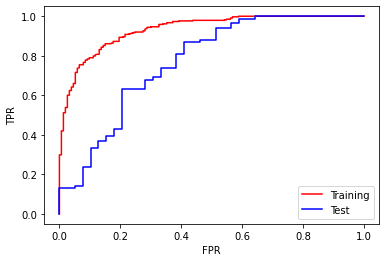

In [108]:
plt.plot(fpr,tpr,c='red',label='Training')
plt.plot(fpr1,tpr1,c='blue',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()